In [41]:
import keras
from keras import layers, models, optimizers
from keras.optimizers import SGD, Adadelta, Adam, RMSprop
from keras.layers import Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Activation,regularizers
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [42]:
class MacOSFile(object):

    def __init__(self, f):
        self.f = f

    def __getattr__(self, item):
        return getattr(self.f, item)

    def read(self, n):
        # print("reading total_bytes=%s" % n, flush=True)
        if n >= (1 << 31):
            buffer = bytearray(n)
            idx = 0
            while idx < n:
                batch_size = min(n - idx, 1 << 31 - 1)
                # print("reading bytes [%s,%s)..." % (idx, idx + batch_size), end="", flush=True)
                buffer[idx:idx + batch_size] = self.f.read(batch_size)
                # print("done.", flush=True)
                idx += batch_size
            return buffer
        return self.f.read(n)

    def write(self, buffer):
        n = len(buffer)
        print("writing total_bytes=%s..." % n, flush=True)
        idx = 0
        while idx < n:
            batch_size = min(n - idx, 1 << 31 - 1)
            print("writing bytes [%s, %s)... " % (idx, idx + batch_size), end="", flush=True)
            self.f.write(buffer[idx:idx + batch_size])
            print("done.", flush=True)
            idx += batch_size


def pickle_dump(obj, file_path):
    with open(file_path, "wb") as f:
        return pickle.dump(obj, MacOSFile(f), protocol=pickle.HIGHEST_PROTOCOL)


def pickle_load(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(MacOSFile(f))

In [43]:

img_rows, img_cols = 32,32
img_channels = 3
X_train, X_test, y_train, y_test = pickle_load("/Users/e175764/Desktop/Third/DataMining/colorful/insta_data1.sav")
#データの処理
categories = ["映える","映えない"]
nb_classes = len(categories)


In [48]:
from keras.models import model_from_json
import numpy as np
# 予測値
model = model_from_json(open('/Users/e175764/Desktop/Third/DataMining/colorful/insta1.json').read())
#保存した重みの読み込み
model.load_weights('/Users/e175764/Desktop/Third/DataMining/colorful/insta1.hdf5')

New_test = []

print(y_test)
for x in range(6):
    choice_idx = np.random.choice(np.where(y_test == 0)[0])
    New_test.append(X_test[choice_idx])
for x in range(6):
    choice_idx = np.random.choice(np.where(y_test == 1)[0])
    New_test.append(X_test[choice_idx])

New_test = np.array(New_test)

# 画像のラベルを推定する
Y_test_pred = model.predict(New_test)

[1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0]


0
0
0
0
0
0
0
0
0
0
0
0


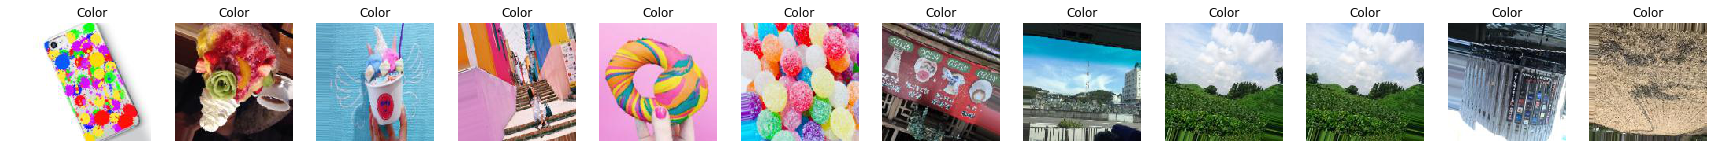

In [49]:
# データの可視化
# 上段は正しいラベル　下段は推測ラベル

fig, ax = plt.subplots(1, 12, figsize=(30, 16))
for for_1 in range(12):
    ax[for_1].imshow(New_test[for_1].reshape(150, 150, 3)) #for_2の値+nでn番目以降のテストデータを出力する．
    print(np.argmax(Y_test_pred[for_1]))
    if np.argmax(Y_test_pred[for_1])==0:
        title="Color"
    else:
        title="Monotone"
    ax[for_1].set_title(title)
    ax[for_1].axis('off')
#print(Y_test_pred)
#print(np.argmax([0.1,0.3]))
#print(y_test[0])


In [ ]:
fig, ax = plt.subplots(1, len(X_test), figsize=(30, 16))
New_test=model.model.predict(X_test)
for for_1 in range(len(X_test)):
    print(for_1)
    ax[for_1].imshow(X_test[for_1].reshape(150, 150, 3)) #for_2の値+nでn番目以降のテストデータを出力する．
    #print(np.argmax(New_test[for_1]))
    if np.argmax(New_test[for_1])==0:
        title="illust"
    else:
        title="picture"
    ax[for_1].set_title(title)
    ax[for_1].axis('off')

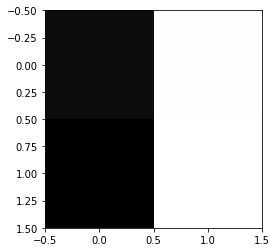

In [241]:
# 予測の可視化
# Y軸が渡した画像の数字　X軸がニューラルネットワークによる推定値
plt.imshow(Y_test_pred[:2], cmap='gray', interpolation='nearest', vmin=0, vmax=1) #Y_test_predの範囲を変えることで予測の場所を変更できる